#### Импорт библиотек

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE

#### Загрузка данных

In [99]:
df = pd.read_excel('training.xlsb', engine='pyxlsb')

In [100]:

test = pd.read_excel('test.xlsb', engine='pyxlsb')

#### Быстрый EDA

In [101]:
print(df.head())

   ID         A         B      C       D         E         F   G     H      I  \
0   1  0.198778  0.099389   0.00  799.90  1.777556  0.888778  13  3.49  Woman   
1   2  0.043000  0.021264  49.97  173.03  0.384511  0.190143  13  3.49  Woman   
2   3  0.067073  0.067073   0.00  329.90  0.599818  0.599818  13  3.49  Woman   
3   4  0.052700  0.052700   0.00  235.65  0.471300  0.471300  13  3.49  Woman   
4   5  0.141880  0.141880   0.00  634.45  1.268900  1.268900  13  3.49  Woman   

           J               K    L            M  \
0  33.750000  Mogilev region  132  NE employee   
1  33.250000    Minsk region    6  NE employee   
2  38.583333  Vitebsk region   71  NE employee   
3  61.250000    Minsk region   48    Pensioner   
4  48.583333    Brest region   48  NE employee   

                                              N               O       P  \
0  Secondary education (plus special education)         Married   2 Two   
1  Secondary education (plus special education)         Marrie

In [102]:
print(df.shape)

(89734, 26)


In [103]:
print(df.groupby('MARKER').size())

MARKER
0    89392
1      342
dtype: int64


In [104]:
print(df.isnull().sum())

ID        0
A         0
B         0
C         0
D         0
E         0
F         0
G         0
H         0
I         0
J         0
K         0
L         0
M         0
N         0
O         0
P         0
Q         0
R         0
S         0
T         0
U         0
V         0
W         0
X         0
MARKER    0
dtype: int64


In [105]:
print(df.describe())

                 ID             A             B             C             D  \
count  89734.000000  89734.000000  89734.000000  89734.000000  89734.000000   
mean   44867.500000      0.167863      0.113511     85.801266    548.507954   
std    25904.118865      0.153851      0.105340    105.366771    448.686233   
min        1.000000      0.000002      0.000001      0.000000     49.980000   
25%    22434.250000      0.065843      0.042922     20.570000    227.030000   
50%    44867.500000      0.119133      0.079733     50.020000    408.735000   
75%    67300.750000      0.220000      0.146990    108.930000    746.710000   
max    89734.000000      7.067250      0.874025   2682.420000   4999.000000   

                  E             F             G             H             J  \
count  89734.000000  89734.000000  89734.000000  89734.000000  89734.000000   
mean       1.011455      0.683640      7.854358      0.510274     41.140778   
std        0.910583      0.622047      4.754588    

In [106]:
print(df['C'].unique())
print(df['G'].unique())
print(df['H'].unique())
print(df['I'].unique())
print(df['K'].unique())
print(df['M'].unique())
print(df['N'].unique())
print(df['O'].unique())
print(df['P'].unique())
print(df['R'].unique())
print(df['S'].unique())
print(df['T'].unique())
print(df['U'].unique())
print(df['V'].unique())
print(df['W'].unique())
print(df['X'].unique())

[  0.    49.97  40.7  ... 521.6  298.35 237.77]
[13 24  5  2 10  4  9 11  6  3 20]
[3.49  1.99  0.01  2.49  3.5   3.    2.99  0.    1.235 1.1   1.17  1.32
 2.5  ]
['Woman' 'Man']
['Mogilev region' 'Minsk region' 'Vitebsk region' 'Brest region' 'Minsk'
 'Grodno region' 'Gomel region']
['NE employee' 'Pensioner' 'Head/Deputy head (organiz.)'
 'Head/Deputy head (division)' 'Enterpreneur']
['Secondary education (plus special education)'
 'Higher education (one or more)' 'Incomplete higher education'
 'Primary or lower secondary education']
['Married' 'Divorced/widow' 'Single/unmarried' 'Cohabitation']
['2 Two' '1 One' '0 Zero' '3 Three' 'More than 3']
['No' 'Yes']
['Works' 'No couple' 'Pensioner' 'Unemployed' 'Student']
['Yes' 'No']
['Yes' 'No']
['No' 'Yes' 'Few']
['Yes' 'No']
['No' 'Yes']


In [134]:
def load_float_data():
    df = pd.read_excel('training.xlsb', engine='pyxlsb')
    
    df = df.rename(columns={'I': 'sex',
                            'J': 'age',
                            'K': 'region',
                            'M': 'job',
                            'N': 'edu',
                            'O': 'married',
                            'P': 'child',
                            'Q': 'property',
                            'S': 'status'})
    
    # Есть текстовые значения - заменим на 1 и 0
    df['sex'] = df['sex'].map({'Man': 1, 'Woman': 0})
    
    df['R'] = df['R'].map({'Yes': 1, 'No': 0})
    df['T'] = df['T'].map({'Yes': 1, 'No': 0})
    df['U'] = df['U'].map({'Yes': 1, 'No': 0})
    df['V'] = df['V'].map({'Yes': 1, 'No': 0, 'Few': 2})
    df['W'] = df['W'].map({'Yes': 1, 'No': 0})
    df['X'] = df['X'].map({'Yes': 1, 'No': 0})
    
    df['edu'] = df['edu'].map({'Higher education (one or more)': 3,
                               'Secondary education (plus special education)': 1,
                               'Incomplete higher education': 2,
                               'Primary or lower secondary education': 0})
    
    df['married'] = df['married'].map({'Married': 1,
                                       'Single/unmarried': 0,
                                       'Divorced/widow': -1,
                                       'Cohabitation': -2})
    
    df['job'] = df['job'].map({'NE employee': 0,
                               'Pensioner': 1,
                               'Head/Deputy head (organiz.)': 2,
                               'Head/Deputy head (division)': 3,
                               'Enterpreneur': 4})
    
    df['region'] = df['region'].map({'Mogilev region': 6,
                                     'Minsk region': 5,
                                     'Vitebsk region': 2,
                                     'Brest region': 1,
                                     'Minsk': 7,
                                     'Grodno region': 4,
                                     'Gomel region': 3})
    df['property'] = df['property'].map({'property': 2, 'rent/hire': 1, 'otherwise': 0})
    df['status'] = df['status'].map({'Works':4, 'No couple':3, 'Pensioner':2, 'Unemployed':0, 'Student':1,})
    
    df['child'] = df['child'].map(lambda x: re.sub('[^0-9]+', '', str(x)))
    df['child'] = df['child'].astype(int)
    
    return df


In [ ]:
df = load_float_data()

In [108]:
pd.set_option('display.max_columns', None)
print(df.head(50))

    ID         A         B       C        D         E         F   G     H  \
0    1  0.198778  0.099389    0.00   799.90  1.777556  0.888778  13  3.49   
1    2  0.043000  0.021264   49.97   173.03  0.384511  0.190143  13  3.49   
2    3  0.067073  0.067073    0.00   329.90  0.599818  0.599818  13  3.49   
3    4  0.052700  0.052700    0.00   235.65  0.471300  0.471300  13  3.49   
4    5  0.141880  0.141880    0.00   634.45  1.268900  1.268900  13  3.49   
5    6  0.054657  0.025507    0.00   171.10  0.488857  0.228133  13  3.49   
6    7  0.117114  0.051238   40.70   366.60  1.047429  0.458250  13  3.49   
7    8  0.088231  0.088231   57.05   512.85  0.789000  0.789000  13  3.49   
8    9  0.079242  0.079242   26.03   233.87  0.708697  0.708697  13  3.49   
9   10  0.080296  0.049273    0.00   223.90  0.829259  0.508864  13  1.99   
10  11  0.058360  0.029180   28.99   260.91  0.521820  0.260910  13  3.49   
11  12  0.115800  0.061306    0.00   931.99  1.035544  0.548229  13  3.49   

#### Визуализация распределения целевого признака

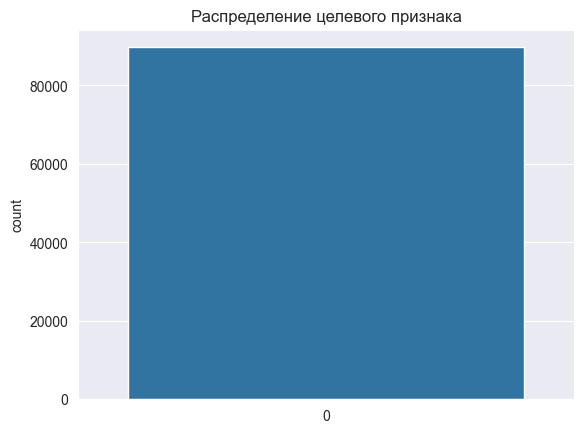

In [109]:
sns.countplot(df['MARKER'])
plt.title('Распределение целевого признака')
plt.show()

#### Видно сильный дисбаланс классов - применим SMOTE

In [110]:
smote = SMOTE()

X = df.drop('MARKER', axis=1)
y = df['MARKER']

X, y = smote.fit_resample(X, y)

#### Разбиваем выборку на train и test

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Обучаем логистическую регрессию

In [112]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

#### Оценка на train

In [113]:
y_pred = log_reg.predict(X_train)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

[[60067 11457]
 [10720 60783]]
              precision    recall  f1-score   support

           0       0.85      0.84      0.84     71524
           1       0.84      0.85      0.85     71503

    accuracy                           0.84    143027
   macro avg       0.84      0.84      0.84    143027
weighted avg       0.84      0.84      0.84    143027


#### Оценка на test

In [114]:
y_pred = log_reg.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[15002  2866]
 [ 2699 15190]]
              precision    recall  f1-score   support

           0       0.85      0.84      0.84     17868
           1       0.84      0.85      0.85     17889

    accuracy                           0.84     35757
   macro avg       0.84      0.84      0.84     35757
weighted avg       0.84      0.84      0.84     35757


#### Поиск оптимальных гиперпараметров логистической регрессии

In [115]:
params = {'C': [0.1, 1, 10, 100]}
grid_search = GridSearchCV(log_reg, params, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

{'C': 1}


#### Обучаем лучшую модель на всей train выборке

In [118]:
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [120]:
df = load_float_data()

In [123]:
from imblearn.under_sampling import NearMiss

# Ресэмплинг 
rus = NearMiss()
X_rus, y_rus = rus.fit_resample(X, y)

# Масштабирование
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_rus)

# Логистическая регрессия
log_reg = LogisticRegression(solver='liblinear') 

params = {
  'C': [0.1, 1, 10, 100],
  'penalty': ['l2'],
  'class_weight': [None, 'balanced']  
}

# Поиск гиперпараметров
grid_search = GridSearchCV(log_reg, param_grid=params, 
                           scoring='roc_auc', cv=5)

grid_search.fit(X_scaled, y_rus)
print(grid_search.best_params_)

# Обучение модели 
best_log_reg = LogisticRegression(**grid_search.best_params_)

# Кросс-валидация
roc_auc = cross_val_score(best_log_reg, X_scaled, y_rus, 
                          cv=5, scoring='roc_auc').mean()
print(roc_auc)

{'C': 100, 'class_weight': 'balanced', 'penalty': 'l2'}
0.9359354850222404


In [125]:
best_log_reg.fit(X_train, y_train)

C:\Users\artyo\PycharmProjects\alpha\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=100, class_weight='balanced')

In [126]:
# Предсказания на тестовой выборке
y_pred = best_log_reg.predict(X_test)

# Оценка качества
from sklearn.metrics import roc_auc_score
test_auc = roc_auc_score(y_test, y_pred)
print(f'ROC AUC: {test_auc:.3f}')

from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(y_test, y_pred)
print(f'accuracy_score: {test_accuracy:.3f}')

from sklearn.metrics import precision_score, recall_score
test_precision = precision_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)
print(f'Precision: {test_precision:.3f}')
print(f'Recall: {test_recall:.3f}')

ROC AUC: 0.750
accuracy_score: 0.750
Precision: 0.741
Recall: 0.768


# RandomForestClassifier

In [135]:
df = load_float_data()

X = df.drop('MARKER', axis=1)
y = df['MARKER']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [136]:
# Балансировка классов
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy=1.0)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [137]:
# Масштабирование 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [138]:
# Случайный лес
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()



In [139]:

# Поиск гиперпараметров
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 8, 15]
}



In [140]:
grid_search = GridSearchCV(rf, param_grid=params, 
                           scoring='roc_auc', cv=5)
grid_search.fit(X_train, y_train)

print('Лучшие параметры:', grid_search.best_params_)

Лучшие параметры: {'max_depth': 15, 'n_estimators': 500}


In [141]:
# Обучение лучшей модели
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, n_estimators=500)

In [142]:
# Предсказания на тесте 
y_pred = best_rf.predict(X_test)

# Метрики
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

auc = roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred) 
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'ROC AUC: {auc:.3f}')
print(f'Accuracy: {acc:.3f}') 
print(f'Precision: {precision:.3f}')
print(f'Recall: {recall:.3f}')

ROC AUC: 0.584
Accuracy: 0.979
Precision: 0.038
Recall: 0.186



# XGBoost

In [88]:
df = load_float_data()

X = df.drop('MARKER', axis=1)
y = df['MARKER']


In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ресэмплинг
resampler = SMOTETomek(sampling_strategy='auto')
X_res, y_res = resampler.fit_resample(X_train, y_train)

# Масштабирование данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_res)

In [90]:
# XGBoost
import xgboost as xgb
xgb = xgb.XGBClassifier()

params = {
  'max_depth': [5, 8, 12],
  'n_estimators': [100, 200, 500],
  'learning_rate': [0.05, 0.1, 0.2]
}

In [91]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(xgb, param_grid=params, scoring='roc_auc', cv=5)
grid_search.fit(X_scaled, y_res)

print(grid_search.best_params_)

{'learning_rate': 0.2, 'max_depth': 8, 'n_estimators': 200}


In [92]:
best_params = grid_search.best_params_ 
from xgboost import XGBClassifier

# создание модели 
best_xgb = XGBClassifier(**best_params)
best_xgb.fit(X_scaled, y_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [94]:
X_test['child'] = X_test['child'].astype(int)

In [95]:
# Предсказания на тестовой выборке
y_pred = best_xgb.predict(X_test)

# Оценка качества
from sklearn.metrics import roc_auc_score
test_auc = roc_auc_score(y_test, y_pred)
print(f'ROC AUC: {test_auc:.3f}')

from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(y_test, y_pred)
print(f'accuracy_score: {test_accuracy:.3f}')

from sklearn.metrics import precision_score, recall_score
test_precision = precision_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)
print(f'Precision: {test_precision:.3f}')
print(f'Recall: {test_recall:.3f}')
    

ROC AUC на тесте: 0.620
Точность на тесте: 0.679
Precision: 0.006
Recall: 0.559
